LOADING THE DATA SETS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sleep_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
heart_df = pd.read_csv("heart.csv")
gym_df = pd.read_csv("gym_members_exercise_tracking.csv")


In [3]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Finding Null Values

In [6]:
sleep_df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
gym_df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [9]:
#splitting "blood Pressure" into Systolic and Diastolic
sleep_df[['Systolic_BP', 'Diastolic_BP']] = sleep_df['Blood Pressure'].str.split('/', expand=True)
sleep_df['Systolic_BP'] = pd.to_numeric(sleep_df['Systolic_BP'])
sleep_df['Diastolic_BP'] = pd.to_numeric(sleep_df['Diastolic_BP'])
sleep_df.drop(columns=['Blood Pressure'], inplace=True)

In [10]:
# Renaming 'sex' to 'gender' in heart_df for consistency
heart_df.rename(columns={'sex': 'gender'}, inplace=True)

In [11]:
#Checking for negative values
sleep_cols = ['Age','Sleep Duration','Stress Level','Heart Rate','Daily Steps']
heart_cols = ['age','gender','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
gym_cols = ['Age','Weight (kg)','Height (m)','Max_BPM','Avg_BPM','Resting_BPM','Session_Duration (hours)','Calories_Burned','Fat_Percentage','Water_Intake (liters)','Workout_Frequency (days/week)','BMI']

sleep_neg= sleep_df[sleep_cols] < 0
sleep_count=sleep_neg.sum()
heart_neg= heart_df[heart_cols] < 0
heart_count=heart_neg.sum()
gym_neg= gym_df[gym_cols] < 0
gym_count=gym_neg.sum()

print("Negative values of Sleep:\n",sleep_count)
print("Negative values of Sleep:\n",heart_count)
print("Negative values of Sleep:\n",gym_count)

Negative values of Sleep:
 Age               0
Sleep Duration    0
Stress Level      0
Heart Rate        0
Daily Steps       0
dtype: int64
Negative values of Sleep:
 age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Negative values of Sleep:
 Age                              0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64


OUTLIER DETECTION

In [12]:
def detect_outliers(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()
    return outlier_indices

sleep_outliers = detect_outliers(sleep_df, ['Sleep Duration', 'Heart Rate','Stress Level'])
heart_outliers = detect_outliers(heart_df, ['chol', 'trestbps', 'thalach'])
gym_outliers = detect_outliers(gym_df, ['Calories_Burned', 'BMI'])

print("\nOutliers in Sleep Dataset:")
for col, outlier_data in sleep_outliers.items():
    print(f"{col}: {len(outlier_data)} outliers")

print("\nOutliers in Heart Dataset:")
for col, outlier_data in heart_outliers.items():
    print(f"{col}: {len(outlier_data)} outliers")

print("\nOutliers in Gym Dataset:")
for col, outlier_data in gym_outliers.items():
    print(f"{col}: {len(outlier_data)} outliers")


Outliers in Sleep Dataset:
Sleep Duration: 0 outliers
Heart Rate: 15 outliers
Stress Level: 0 outliers

Outliers in Heart Dataset:
chol: 16 outliers
trestbps: 30 outliers
thalach: 4 outliers

Outliers in Gym Dataset:
Calories_Burned: 10 outliers
BMI: 25 outliers


Fixing Outliers by Capping method

In [13]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
      
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

sleep_df = cap_outliers_iqr(sleep_df, ['Heart Rate'])
heart_df = cap_outliers_iqr(heart_df, ['chol', 'trestbps', 'thalach'])
gym_df = cap_outliers_iqr(gym_df, ['Calories_Burned', 'BMI'])


In [14]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,78.0,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,78.0,3000,Sleep Apnea,140,90


In [15]:
#Standardizing column names
sleep_df.rename(columns={'Person ID': 'person_id', 'Gender': 'gender', 'Age': 'age'}, inplace=True)
gym_df.rename(columns={'Age': 'age', 'Gender': 'gender'}, inplace=True)

In [16]:
#changing gender to 1,0
sleep_df['gender'] = sleep_df['gender'].map({'Male': 1, 'Female': 0})
gym_df['gender'] = gym_df['gender'].map({'Male': 1, 'Female': 0})

In [17]:
# Converting BMI Category and sleep disorder into numerical encoding
bmi_mapping = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
sleep_df['BMI'] = sleep_df['BMI Category'].map(bmi_mapping)
sleep_df.drop(columns=['BMI Category'], inplace=True)
sleep_df['sleep_disorder'] = sleep_df['Sleep Disorder'].map(lambda x: 1 if x != 'None' else 0)
sleep_df.drop(columns=['Sleep Disorder'], inplace=True)


In [18]:
#merging based on Age and Gender
merged_df = heart_df.merge(sleep_df, on=['age', 'gender'], how='inner')
merged_df = merged_df.merge(gym_df, on=['age', 'gender'], how='inner')

In [19]:
merged_df.shape

(42284, 39)

In [20]:
duplicate_rows = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")



missing_values = merged_df.isnull().sum().sum()

print(f"Number of missing values: {missing_values}")


Number of duplicate rows: 29383
Number of missing values: 1488


In [21]:
# Remove duplicate rows
merged_df = merged_df.drop_duplicates()

# Handle missing values by filling with the median for numerical columns
merged_df = merged_df.fillna(merged_df.median(numeric_only=True))

In [22]:
merged_df.shape

(12901, 39)

## Exploratory Data Analysis (EDA)

In [23]:
merged_df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI_y
count,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,...,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000,12901.000000
mean,45.386249,0.608402,0.884815,126.102628,239.696225,0.091466,0.585381,159.295946,0.220836,0.700566,...,179.187660,143.406015,61.508333,1.243840,862.580188,24.999109,2.689071,3.310441,1.730564,24.845879
std,5.942687,0.488126,0.923376,12.934409,45.367381,0.288282,0.497061,18.804164,0.414826,0.909893,...,11.689513,13.923883,7.370349,0.301189,235.475368,5.937617,0.587108,0.959558,0.732175,6.298575
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,114.000000,0.000000,0.000000,...,160.000000,120.000000,50.000000,0.510000,350.000000,10.100000,1.500000,2.000000,1.000000,12.470000
25%,43.000000,0.000000,0.000000,118.000000,211.000000,0.000000,0.000000,146.000000,0.000000,0.000000,...,170.000000,132.000000,55.000000,1.080000,713.000000,21.700000,2.200000,3.000000,1.000000,20.120000
50%,43.000000,1.000000,1.000000,126.000000,236.000000,0.000000,1.000000,162.000000,0.000000,0.100000,...,179.000000,142.000000,63.000000,1.240000,842.000000,26.300000,2.700000,3.000000,2.000000,23.750000
75%,50.000000,1.000000,2.000000,132.000000,264.000000,0.000000,1.000000,173.000000,0.000000,1.200000,...,188.000000,155.000000,67.000000,1.400000,988.000000,28.600000,3.300000,4.000000,2.000000,28.490000
max,59.000000,1.000000,3.000000,170.000000,371.000000,1.000000,2.000000,202.000000,1.000000,4.000000,...,199.000000,169.000000,74.000000,1.990000,1610.000000,35.000000,3.700000,5.000000,3.000000,41.235000


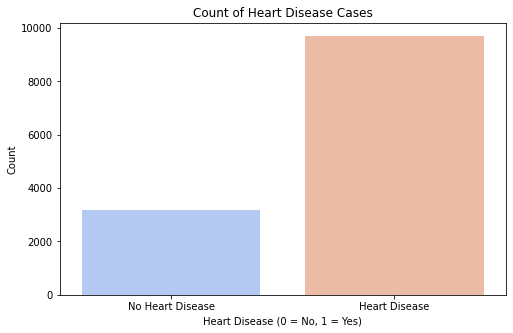

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='target', palette='coolwarm')
plt.title("Count of Heart Disease Cases")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"])
plt.show()

In [25]:
# balanced data according to the target by down sampling as 1s(Heart Disease)
df_majority = merged_df[merged_df['target'] == 1]  
df_minority = merged_df[merged_df['target'] == 0]  

df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

balanced_df = pd.concat([df_majority_downsampled, df_minority])
df = balanced_df

In [26]:
balanced_df.shape

(6386, 39)

In [27]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI_y
19291,49,1,1,130.0,266.0,0,1,171.0,0,0.6,...,158,50,1.03,806.0,Strength,26.7,3.4,3,2,29.980
6231,44,1,1,120.0,220.0,0,1,170.0,0,0.0,...,130,56,1.28,824.0,Cardio,25.7,3.5,4,2,29.260
23234,45,0,0,138.0,236.0,0,0,152.0,1,0.2,...,130,59,0.74,433.0,Cardio,27.7,2.5,2,1,15.730
40582,53,0,0,130.0,264.0,0,0,143.0,0,0.4,...,149,74,1.06,711.0,HIIT,28.4,1.5,4,2,15.430
26670,43,1,0,150.0,247.0,0,1,171.0,0,1.5,...,155,53,1.14,875.0,Cardio,24.1,2.9,3,2,41.235


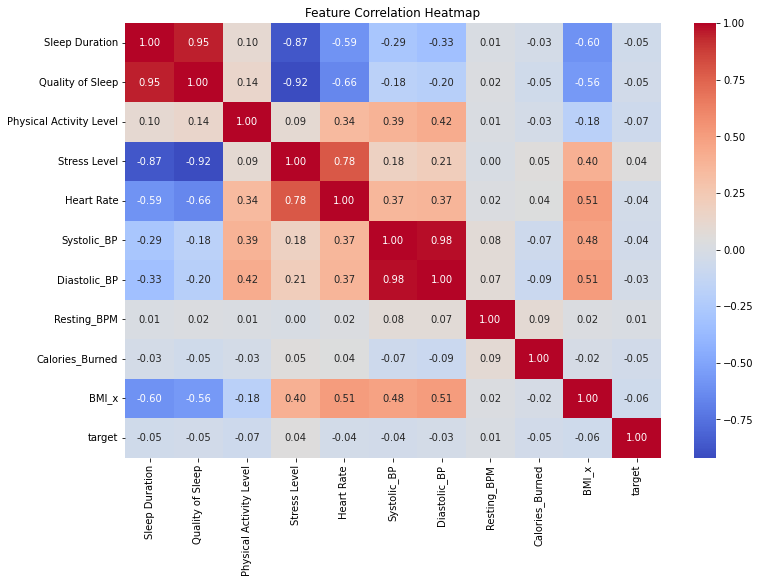

In [28]:

correlation_columns = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                       'Stress Level', 'Heart Rate', 'Systolic_BP', 'Diastolic_BP', 
                       'Resting_BPM', 'Calories_Burned', 'BMI_x', 'target']

correlation_df = merged_df[correlation_columns].dropna()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [29]:
missing_values = balanced_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                              0
gender                           0
cp                               0
trestbps                         0
chol                             0
fbs                              0
restecg                          0
thalach                          0
exang                            0
oldpeak                          0
slope                            0
ca                               0
thal                             0
target                           0
person_id                        0
Occupation                       0
Sleep Duration                   0
Quality of Sleep                 0
Physical Activity Level          0
Stress Level                     0
Heart Rate                       0
Daily Steps                      0
Systolic_BP                      0
Diastolic_BP                     0
BMI_x                            0
sleep_disorder                   0
Weight (kg)                      0
Height (m)                       0
Max

In [30]:
summary_statistics = balanced_df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
                age       gender           cp     trestbps         chol  \
count  6386.000000  6386.000000  6386.000000  6386.000000  6386.000000   
mean     45.204666     0.666614     0.662543   126.305669   236.012527   
std       6.161790     0.471460     0.908136    13.475738    46.513081   
min      29.000000     0.000000     0.000000    94.000000   141.000000   
25%      42.000000     0.000000     0.000000   120.000000   199.000000   
50%      43.000000     1.000000     0.000000   122.000000   236.000000   
75%      50.000000     1.000000     1.000000   132.000000   256.000000   
max      59.000000     1.000000     3.000000   170.000000   371.000000   

               fbs      restecg      thalach        exang      oldpeak  ...  \
count  6386.000000  6386.000000  6386.000000  6386.000000  6386.000000  ...   
mean      0.145474     0.497495   154.015346     0.381459     0.849749  ...   
std       0.352606     0.508727    20.097828     0.485783     1.054006  ..

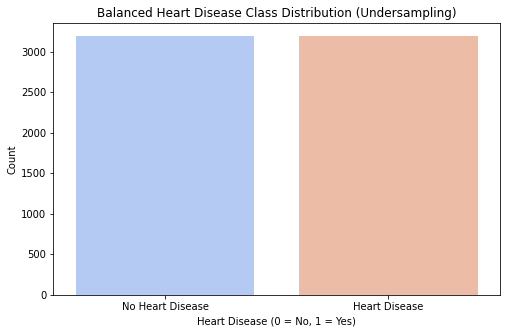

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=balanced_df, x='target', palette='coolwarm')
plt.title("Balanced Heart Disease Class Distribution (Undersampling)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"])
plt.show()

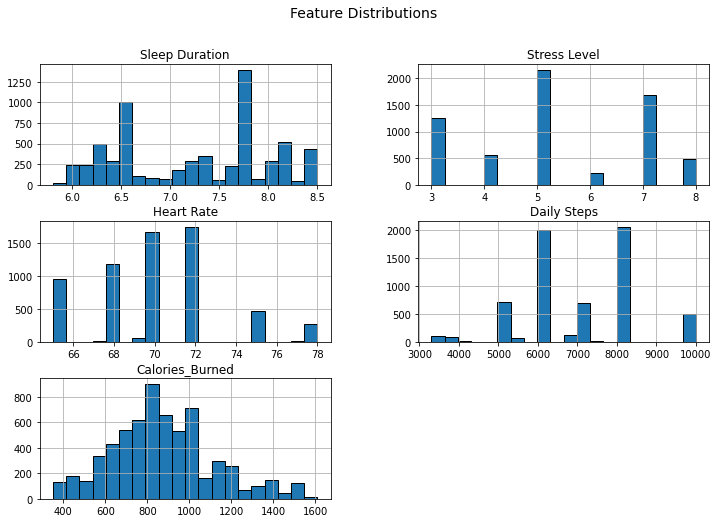

In [32]:
# Histograms for key variables
balanced_df[['Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Calories_Burned']].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()

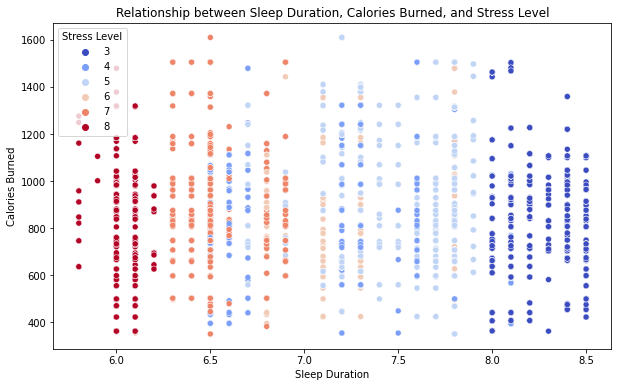

In [33]:
# Scatter plot: Sleep Duration vs Calories Burned with Stress Level hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=balanced_df, x='Sleep Duration', y='Calories_Burned', hue='Stress Level', palette='coolwarm')
plt.title('Relationship between Sleep Duration, Calories Burned, and Stress Level')
plt.xlabel('Sleep Duration')
plt.ylabel('Calories Burned')
plt.show()

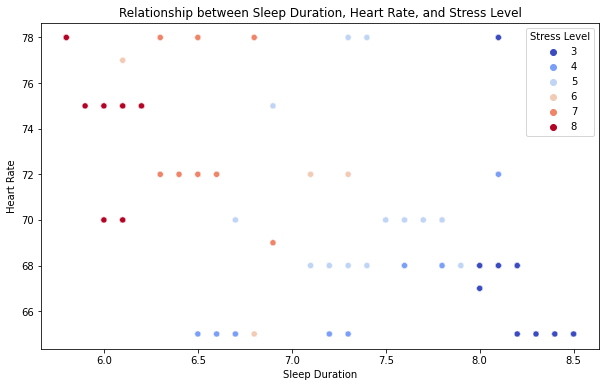

In [34]:
# Scatter plot: Sleep Duration vs Heart Rate with Stress Level hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=balanced_df, x='Sleep Duration', y='Heart Rate', hue='Stress Level', palette='coolwarm')
plt.title('Relationship between Sleep Duration, Heart Rate, and Stress Level')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.show()

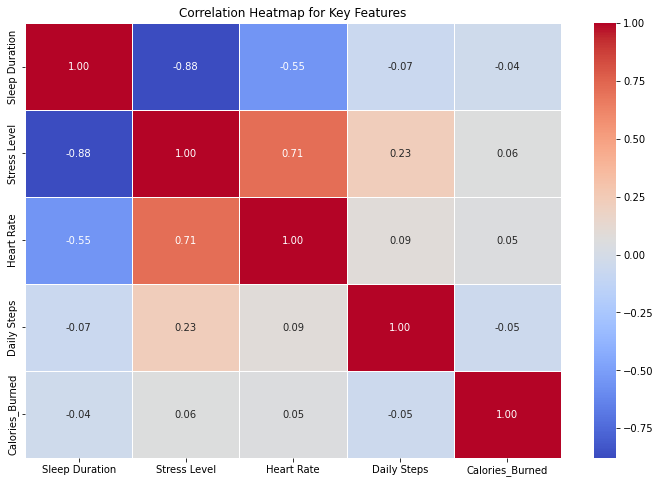

In [35]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(balanced_df[['Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Calories_Burned']].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Key Features')
plt.show()


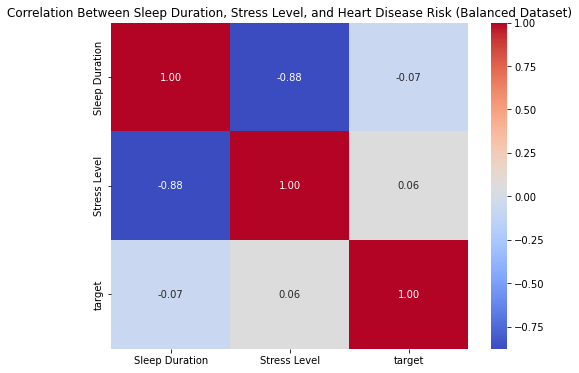

In [36]:
#finding correlation between Sleep Duration,Stress level, and Heart Disease Risk
correlation_columns = ['Sleep Duration', 'Stress Level', 'target']

correlation_matrix = balanced_df[correlation_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sleep Duration, Stress Level, and Heart Disease Risk (Balanced Dataset)")
plt.show()

# MILESTONE_2

In [37]:
print(df.columns)

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'person_id',
       'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Systolic_BP', 'Diastolic_BP', 'BMI_x', 'sleep_disorder', 'Weight (kg)',
       'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI_y'],
      dtype='object')


In [38]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI_y
19291,49,1,1,130.0,266.0,0,1,171.0,0,0.6,...,158,50,1.03,806.0,Strength,26.7,3.4,3,2,29.980
6231,44,1,1,120.0,220.0,0,1,170.0,0,0.0,...,130,56,1.28,824.0,Cardio,25.7,3.5,4,2,29.260
23234,45,0,0,138.0,236.0,0,0,152.0,1,0.2,...,130,59,0.74,433.0,Cardio,27.7,2.5,2,1,15.730
40582,53,0,0,130.0,264.0,0,0,143.0,0,0.4,...,149,74,1.06,711.0,HIIT,28.4,1.5,4,2,15.430
26670,43,1,0,150.0,247.0,0,1,171.0,0,1.5,...,155,53,1.14,875.0,Cardio,24.1,2.9,3,2,41.235


## Feature Engineering - Feature Creation

In [39]:
# Added two cross-dataset features

# 1. Heart Resilience Score
df['heart_resilience_score'] = (
    (df['thalach'] / df['Heart Rate']) * (df['Daily Steps'] / 1000)
)

# 2. Lifestyle Recovery Index
df['lifestyle_recovery_index'] = (
    (df['Sleep Duration'] * df['Calories_Burned']) / (df['Stress Level'] + 1)
)

# Created project-specific risk label
df['heart_risk'] = (
    (df['Stress Level'] > 7) |
    (df['Sleep Duration'] < 6) |
    (df['Physical Activity Level'] < 3) |
    (df['Calories_Burned'] < 200) |
    (df['Water_Intake (liters)'] < 2.0) |
    (df['Heart Rate'] > 100) |
    (df['Systolic_BP'] > 140) |
    (df['chol'] > 240)
).astype(int)


In [40]:
df[['heart_resilience_score', 'lifestyle_recovery_index', 'heart_risk']].head()


,heart_resilience_score,lifestyle_recovery_index,heart_risk
19291,8.111538,1632.1500,1
6231,14.166667,648.9000,0
23234,14.030769,571.5600,0
40582,11.000000,1493.1000,1
26670,14.250000,710.9375,1


## Feature Engineering - Categorical Variable Encoding

In [41]:
# Encoded 'experience_level' (ordinal)
# Assuming: 1 = Beginner, 2 = Intermediate, 3 = Advanced
#gender already encoded in Milestone 1
experience_mapping = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}
df['experience_level_label'] = df['Experience_Level'].map(experience_mapping)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level_label'])

# One-hot encode 'workout_type' (nominal)
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=True)


print(df[['Experience_Level', 'experience_level_label', 'experience_level_encoded']].head())
print("\nWorkout type columns:", [col for col in df.columns if col.startswith("Workout_Type_")])



       Experience_Level experience_level_label  experience_level_encoded
19291                 2           Intermediate                         2
6231                  2           Intermediate                         2
23234                 1               Beginner                         1
40582                 2           Intermediate                         2
26670                 2           Intermediate                         2

Workout type columns: ['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']


In [42]:
feature_candidates = [
    'age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level',
    'Physical Activity Level', 'Calories_Burned', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'Heart Rate', 'Systolic_BP',
    'Diastolic_BP', 'chol', 'trestbps', 'thalach', 'BMI_y',
    'heart_resilience_score', 'lifestyle_recovery_index',
    'gender', 'experience_level_encoded'
]

X = df[feature_candidates]
y = df['heart_risk']


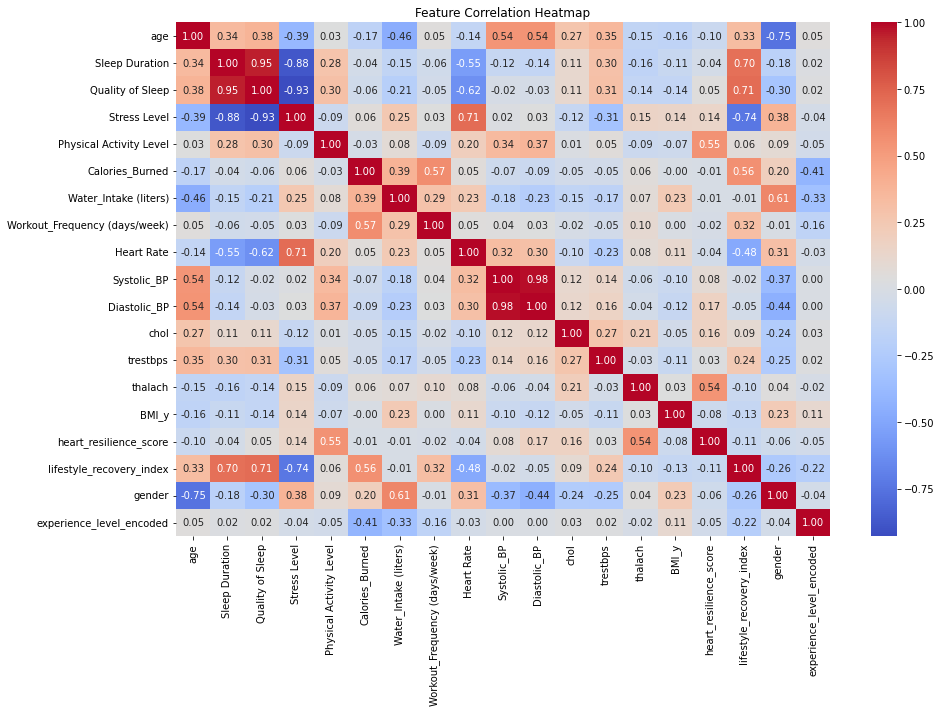

In [43]:
# Correlation matrix of numeric features
plt.figure(figsize=(14, 10))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


## Feature Selection - Feature Importance Evaluation

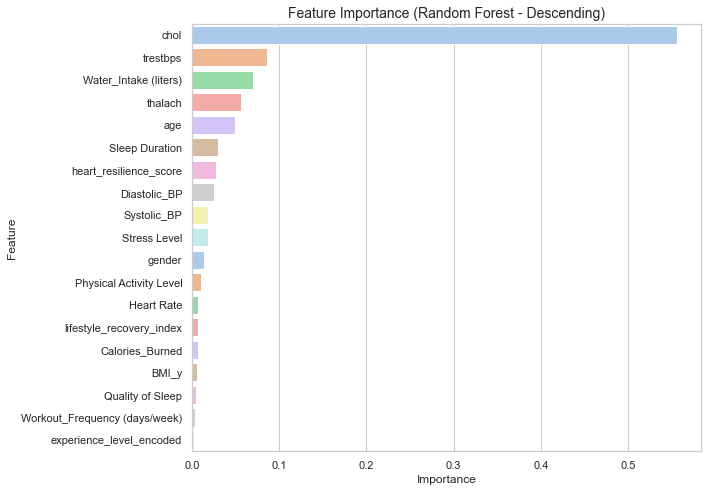

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define feature list (all features including engineered ones)
full_features = [
    'chol', 'trestbps', 'Water_Intake (liters)', 'age', 'thalach',
    'heart_resilience_score', 'Systolic_BP', 'Diastolic_BP',
    'Sleep Duration', 'gender', 'Stress Level', 'Physical Activity Level',
    'Quality of Sleep', 'Calories_Burned', 'lifestyle_recovery_index',
    'Heart Rate', 'BMI_y', 'Workout_Frequency (days/week)', 'experience_level_encoded'
]


X_full = df[full_features]  
y = df['heart_risk']        


X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)


feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_full.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (Random Forest - Descending)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

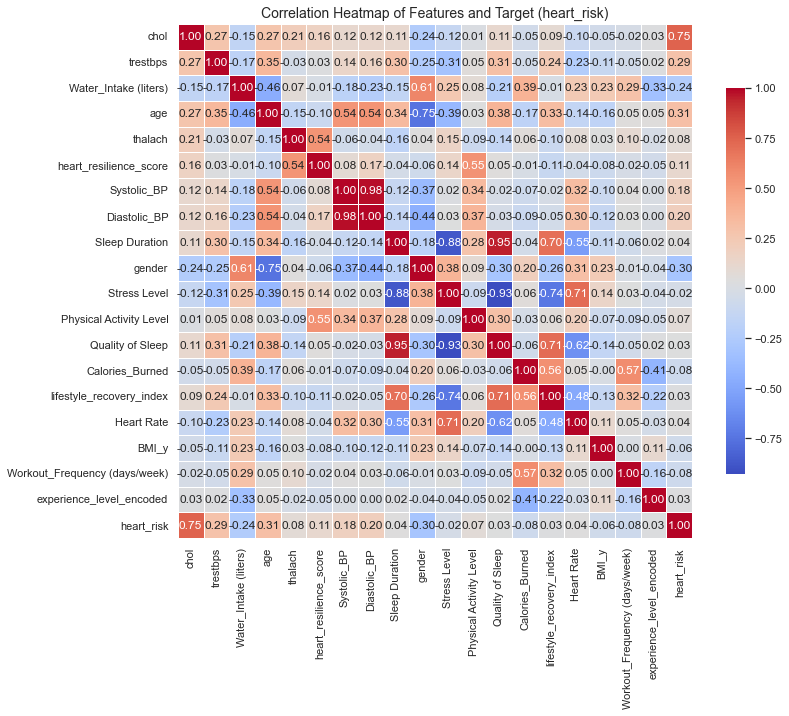

In [45]:
sns.set(style="white")

correlation_matrix = df[full_features + ['heart_risk']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,         
    fmt=".2f",           
    cmap="coolwarm",     
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title("Correlation Heatmap of Features and Target (heart_risk)", fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
#selecting all important features for training
project_features = importance_df['Feature'].tolist()

x_project = df[project_features]


## Data Modeling - Data Splitting

In [47]:
X_project = df[project_features]
y_project = df['heart_risk']

# splitting the dataset into 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_project, y_project, test_size=0.2, stratify=y_project, random_state=42
)



### Training on three different models(with all features)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scaling features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


#Training 3 different models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(probability=True, class_weight='balanced')
}


### Model Evaluation and Comparison(all features)

In [49]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# model performance when using all features 
results_df = pd.DataFrame(results)
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.942879   0.952452  0.939883  0.946125
1        Random Forest  0.999218   0.998536  1.000000  0.999267
2                  SVM  0.985133   0.991111  0.980938  0.985999


### Testing the model(all features)

In [50]:
import pandas as pd

# Define full feature input profile
test_input_full = {
    "chol": 210,
    "trestbps": 125,
    "Water_Intake (liters)": 2.5,
    "thalach": 165,
    "age": 45,
    "Sleep Duration": 7,
    "heart_resilience_score": (165 / 72) * (7000 / 1000),
    "Diastolic_BP": 82,
    "Systolic_BP": 130,
    "Stress Level": 5,
    "gender": 1,
    "Physical Activity Level": 4,
    "Heart Rate": 72,
    "lifestyle_recovery_index": (7 * 450) / (5 + 1),
    "Calories_Burned": 450,
    "BMI_y": 24,
    "Quality of Sleep": 4,
    "Workout_Frequency (days/week)": 3,
    "experience_level_encoded": 1
}

# Feature order used during training
project_features = [
    'chol', 'trestbps', 'Water_Intake (liters)', 'thalach', 'age',
    'Sleep Duration', 'heart_resilience_score', 'Diastolic_BP',
    'Systolic_BP', 'Stress Level', 'gender', 'Physical Activity Level',
    'Heart Rate', 'lifestyle_recovery_index', 'Calories_Burned', 'BMI_y',
    'Quality of Sleep', 'Workout_Frequency (days/week)', 'experience_level_encoded'
]

# Test function for all-features model
def predict_full_model(input_dict, model, scaler, feature_order):
    X_input = pd.DataFrame([[input_dict[feat] for feat in feature_order]], columns=feature_order)
    X_scaled = pd.DataFrame(
        scaler.transform(X_input),
        columns=X_input.columns,
        index=X_input.index
    )
    pred_class = model.predict(X_scaled)[0]
    pred_proba = model.predict_proba(X_scaled)[0][1]
    print("Predicted Class:", pred_class)
    print("Probability of Heart Risk:", round(pred_proba * 100, 2), "%")

# Run prediction (using Random Forest from models dictionary)
predict_full_model(test_input_full, models["Random Forest"], scaler, project_features)


Predicted Class: 0
Probability of Heart Risk: 13.0 %


### Training three models with lifestyle specific features

In [51]:
lifestyle_features = [
    'Sleep Duration', 'Quality of Sleep', 'Stress Level',
    'Physical Activity Level', 'Calories_Burned', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'experience_level_encoded',
    'Heart Rate', 'lifestyle_recovery_index', 'heart_resilience_score',
    'BMI_y', 'gender', 'age'
]

X_lifestyle = df[lifestyle_features]
y_lifestyle = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X_lifestyle, y_lifestyle, test_size=0.2, random_state=42, stratify=y_lifestyle
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}


### Model Evaluation and Comparison(lifestyle features)

In [52]:

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    })
### model performance when using lifestyle specific features 
results_lifestyle_df = pd.DataFrame(results)
print("Lifestyle-Only Model Evaluation:")
print(results_lifestyle_df)

Lifestyle-Only Model Evaluation:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.803599   0.808917  0.794992  0.801894
1        Random Forest  0.979656   0.985737  0.973396  0.979528
2                  SVM  0.852113   0.859425  0.841941  0.850593


### Testing the Model(lifestyle features)

In [53]:
import pandas as pd

#Define input profile (lifestyle-focused only)
test_input_lifestyle = {
    "Sleep Duration": 7,
    "Quality of Sleep": 4,
    "Stress Level": 5,
    "Physical Activity Level": 4,
    "Calories_Burned": 450,
    "Water_Intake (liters)": 2.5,
    "Workout_Frequency (days/week)": 3,
    "experience_level_encoded": 1,
    "Heart Rate": 72,
    "lifestyle_recovery_index": (7 * 450) / (5 + 1),
    "heart_resilience_score": (165 / 72) * (7000 / 1000),
    "BMI_y": 24,
    "gender": 1,
    "age": 45
}

# Lifestyle features used for training
lifestyle_features = [
    'Sleep Duration', 'Quality of Sleep', 'Stress Level',
    'Physical Activity Level', 'Calories_Burned', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'experience_level_encoded',
    'Heart Rate', 'lifestyle_recovery_index', 'heart_resilience_score',
    'BMI_y', 'gender', 'age'
]

# Prediction function for lifestyle model
def predict_lifestyle_model(input_dict, model, scaler, feature_order):
    X_input = pd.DataFrame([[input_dict[feat] for feat in feature_order]], columns=feature_order)
    X_scaled = pd.DataFrame(
        scaler.transform(X_input),
        columns=X_input.columns,
        index=X_input.index
    )
    pred_class = model.predict(X_scaled)[0]
    pred_proba = model.predict_proba(X_scaled)[0][1]
    print("Predicted Class:", pred_class)
    print("Probability of Heart Risk:", round(pred_proba * 100, 2), "%")

# Run prediction (using Random Forest model)
predict_lifestyle_model(test_input_lifestyle, models["Random Forest"], scaler, lifestyle_features)


Predicted Class: 1
Probability of Heart Risk: 88.0 %
